In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

## PROBLEM    from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:/Users/as/Downloads/googleplaystore (2) - Copy.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
## How many ratings are more than 5- (Outliers)

df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
df.drop([10472],inplace=True)
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [7]:
df.isnull().sum() ## No null value

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [11]:
df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [12]:
# Cleaning Categories into integers

CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [13]:
#scaling and cleaning size of installation

def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

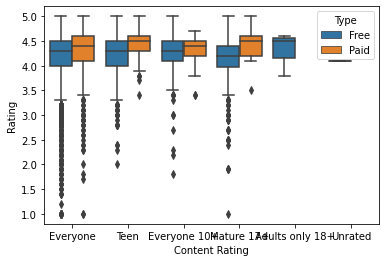

In [14]:
sns.boxplot(x="Content Rating",y="Rating",hue="Type",data=df)  ## boxplot for Rating vs. Content Rating
plt.show()

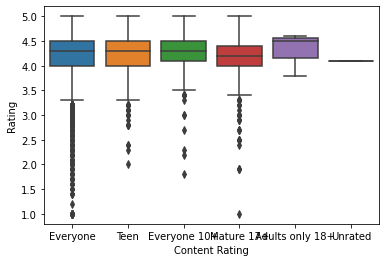

In [15]:
sns.boxplot(x="Content Rating",y="Rating",data=df)
plt.show()

<AxesSubplot:>

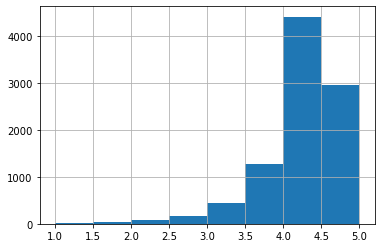

In [16]:
## Histogram for Rating

## Left skewed

df['Rating'].hist(bins=8)

<AxesSubplot:>

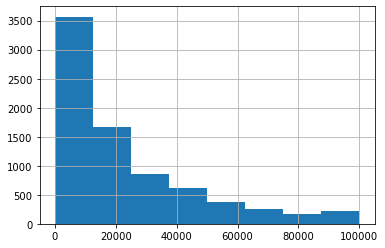

In [17]:
## Histogram for Rating

## Left skewed

df['Size'].hist(bins=8)

In [18]:
ax = sns.boxplot(x=df["Reviews"])

TypeError: Horizontal orientation requires numeric `x` variable.

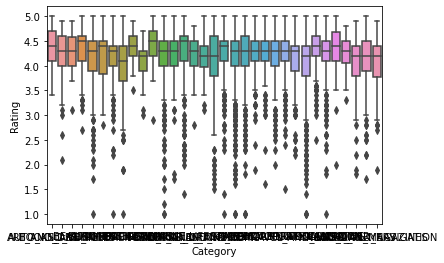

In [19]:
sns.boxplot(x="Category",y="Rating",data=df) ## boxplot for Ratings vs. Category
plt.show()

In [20]:
# Let's convert Price, Reviews and Installs into numerical values

df["Price"]= df["Price"].apply(lambda x:str(x).replace("$","") if "$" in str(x) else str(x))
df["Price"]= df["Price"].apply(lambda x: float(x))
df["Reviews"]= pd.to_numeric(df["Reviews"], errors="coerce")

df["Installs"]= df["Installs"].apply(lambda x: str(x).replace("+","") if "+" in str(x) else str(x))
df["Installs"]= df["Installs"].apply(lambda x: str(x).replace(",","") if "," in str(x) else str(x))
df["Installs"]=df["Installs"].apply(lambda x: float(x))

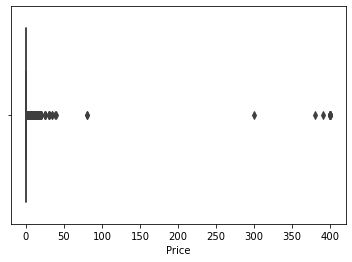

In [21]:
ax = sns.boxplot(x=df["Price"])

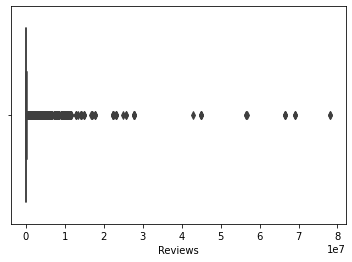

In [22]:
ax = sns.boxplot(x=df["Reviews"])

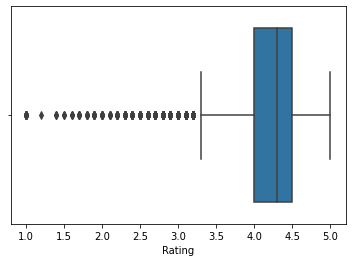

In [23]:
ax = sns.boxplot(x=df["Rating"])

C:\Users\Asrar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


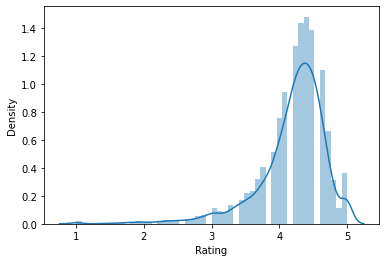

In [24]:
df["Rating"]= pd.to_numeric(df["Rating"],errors="coerce")

sns.distplot(df["Rating"],kde=True);

In [25]:
## App which hasn't been updated


df.iloc[0]['App']

'Photo Editor & Candy Camera & Grid & ScrapBook'

In [26]:
df['Installs'].describe(percentiles = [0.90])

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
50%      5.000000e+05
90%      1.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

In [27]:
## Installs :the different percentiles – 10, 25, 50, 70, 90, 95, 99

df['Reviews'].describe(percentiles = [0.1,0.25,0.5,0.7,0.90,0.95,.99])

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
10%      1.900000e+01
25%      1.867500e+02
50%      5.955000e+03
70%      4.887020e+04
90%      5.913219e+05
95%      1.859109e+06
99%      9.882937e+06
max      7.815831e+07
Name: Reviews, dtype: float64

In [28]:
## ## Installs :the different percentiles – 10, 25, 50, 70, 90, 95, 90

df['Installs'].describe(percentiles = [0.1,0.25,0.5,0.7,0.90,0.95,.99])

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      5.000000e+05
70%      5.000000e+06
90%      1.000000e+07
95%      1.000000e+08
99%      5.000000e+08
max      1.000000e+09
Name: Installs, dtype: float64

In [29]:
df[df. Installs >  5.000000e+08] ## 500000000

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,3
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,6
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,6
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,6
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,6
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,6
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,6
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,6
386,Hangouts,COMMUNICATION,4.0,3419433,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,6
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,6


In [30]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [31]:

#Converting Type classification into binary

def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [32]:
df[df.Type==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500.0,0,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,18
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,0,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,18
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100.0,0,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,18
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,0,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,3


In [33]:
## $200 indeed a high price ,drop Price >200


df = df.drop(df[df.Type > 0].index)
                

In [34]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8715 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8715 non-null   object 
 1   Category        8715 non-null   object 
 2   Rating          8715 non-null   float64
 3   Reviews         8715 non-null   int64  
 4   Size            7146 non-null   float64
 5   Installs        8715 non-null   float64
 6   Type            8715 non-null   int64  
 7   Price           8715 non-null   float64
 8   Content Rating  8715 non-null   object 
 9   Genres          8715 non-null   object 
 10  Last Updated    8715 non-null   object 
 11  Current Ver     8715 non-null   object 
 12  Android Ver     8715 non-null   object 
 13  Category_c      8715 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 987.2+ KB


In [36]:
## Drop records having more than 2 million reviews.

df[df.Reviews >2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,1.000000e+08,0,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,3
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,0,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,6
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,0,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,6
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,0,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,6
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1.000000e+09,0,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,1.000000e+08,0,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up,17
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,NaN,1.000000e+08,0,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up,24
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,1.000000e+08,0,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up,18
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,1.000000e+07,0,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up,18


In [37]:
df = df.drop(df[df.Reviews > 2000000].index)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8264 non-null   object 
 1   Category        8264 non-null   object 
 2   Rating          8264 non-null   float64
 3   Reviews         8264 non-null   int64  
 4   Size            6927 non-null   float64
 5   Installs        8264 non-null   float64
 6   Type            8264 non-null   int64  
 7   Price           8264 non-null   float64
 8   Content Rating  8264 non-null   object 
 9   Genres          8264 non-null   object 
 10  Last Updated    8264 non-null   object 
 11  Current Ver     8264 non-null   object 
 12  Android Ver     8264 non-null   object 
 13  Category_c      8264 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 936.2+ KB


In [39]:
# Cleaning Categories into integers

CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [40]:
#Cleaning of content rating classification

RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [41]:
df.info() ## Reviews should not be more than installs as only those who installed can review the app. 
                     ## No Install no Reviews

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8264 non-null   object 
 1   Category        8264 non-null   object 
 2   Rating          8264 non-null   float64
 3   Reviews         8264 non-null   int64  
 4   Size            6927 non-null   float64
 5   Installs        8264 non-null   float64
 6   Type            8264 non-null   int64  
 7   Price           8264 non-null   float64
 8   Content Rating  8264 non-null   int32  
 9   Genres          8264 non-null   object 
 10  Last Updated    8264 non-null   object 
 11  Current Ver     8264 non-null   object 
 12  Android Ver     8264 non-null   object 
 13  Category_c      8264 non-null   int32  
dtypes: float64(4), int32(2), int64(2), object(6)
memory usage: 903.9+ KB


In [42]:
# dropping of unrelated and unnecessary items

df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [43]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [44]:
df.isnull().sum()

Category             0
Rating               0
Reviews              0
Size              1337
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Category_c           0
Genres_c             0
dtype: int64

In [45]:
df.dropna(inplace = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6927 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        6927 non-null   object 
 1   Rating          6927 non-null   float64
 2   Reviews         6927 non-null   int64  
 3   Size            6927 non-null   float64
 4   Installs        6927 non-null   float64
 5   Type            6927 non-null   int64  
 6   Price           6927 non-null   float64
 7   Content Rating  6927 non-null   int32  
 8   Genres          6927 non-null   object 
 9   Category_c      6927 non-null   int32  
 10  Genres_c        6927 non-null   int32  
dtypes: float64(4), int32(3), int64(2), object(2)
memory usage: 568.2+ KB


In [47]:
df.loc[df["Installs"].idxmax()]

Category          NEWS_AND_MAGAZINES
Rating                           3.9
Reviews                       877635
Size                           13000
Installs                       1e+09
Type                               0
Price                              0
Content Rating                     1
Genres              News & Magazines
Category_c                        31
Genres_c                          98
Name: 3736, dtype: object

In [48]:
df = df.drop(df[df.Installs ==0].index) ## Reviews should not be more than installs as only those 
                                             ## who installed can review the app. 
                                                ## If there are any such records, drop them.

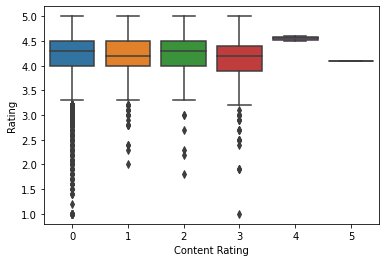

In [49]:
sns.boxplot(x="Content Rating",y="Rating",data=df) ## boxplot for Rating vs. Content Rating
plt.show()

In [50]:
##  Install to reduce the skew. Apply log transformation (np.log1p

df['Installs']=np.log1p(df['Installs'])

In [51]:
## Reviews to reduce the skew. Apply log transformation (np.log1p


df['Reviews']=np.log1p(df['Reviews'])

<ipython-input-52-c3dfed3aaf8a>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


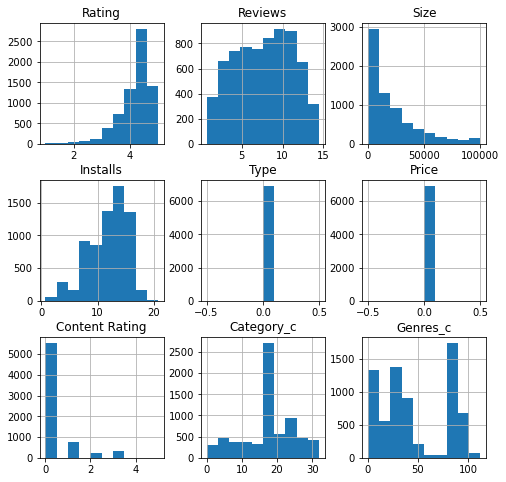

In [52]:
## HISTROGRAM  for 'Rating' and 'Size'  others

fig = plt.figure(figsize = (8,8))   ##   df.hist()
                                   # plt.show()
ax = fig.gca()
df.hist(ax=ax)
plt.show()

<AxesSubplot:>

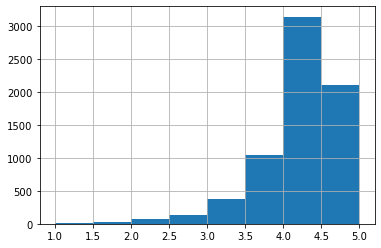

In [53]:
## Histogram for Rating

## Left skewed

df['Rating'].hist(bins=8)

<AxesSubplot:>

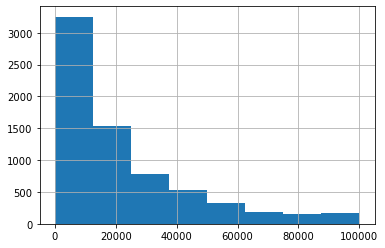

In [54]:
## Histogram for Size

## Right skewed

df['Size'].hist(bins=8)

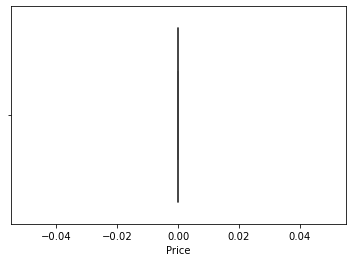

In [55]:
ax = sns.boxplot(x=df["Price"])

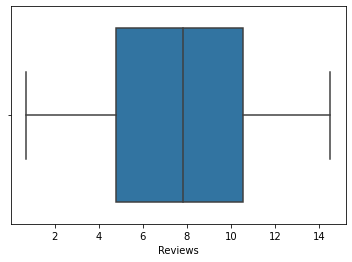

In [56]:
bx=sns.boxplot(x=df["Reviews"])

In [ ]:
## Boxplot for Reviews

sns.boxplot(x="Reviews",y="Rating",hue="Type",data=df)
plt.show()

In [ ]:
sns.boxplot(x="Content Rating",y="Rating",data=df) ## boxplot for Ratings vs. Category
plt.show()

In [ ]:
sns.boxplot(x="Content Rating",y="Rating",hue="Type",data=df)
plt.show()

In [ ]:
sns.boxplot(x="Category",y="Rating",data=df) ## boxplot for Ratings vs. Category
plt.show()

In [ ]:
## Boxplot for Reviews


df.boxplot(by ='Reviews', column ='Rating', grid = False)

In [ ]:
## Boxplot for ## Make boxplot for Rating vs. Content Rating


sns.boxplot(x="Content Rating",y="Rating",hue="Type",data=df)
plt.show()


### All paid apps have a better rating in the content rating.

## Are there any outliers? Think about the price of usual apps on Play Store.

## thare are outliers in 'Everyone' of 'Free ' apps

## Ans thare are outliers in 'Mature' of 'Free' apps


In [ ]:
##  Boxplot for Price

sns.boxplot(x="Price",y="Rating",hue="Type",data=df)
plt.show()

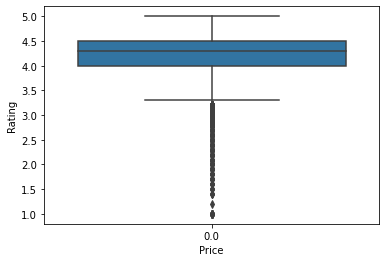

In [194]:
sns.boxplot(x="Price",y="Rating",data=df)
plt.show()

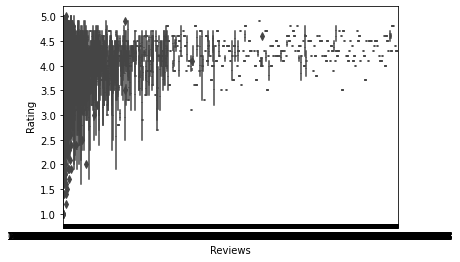

In [66]:
sns.boxplot(x="Reviews",y="Rating",data=df)
plt.show()

In [67]:
import re

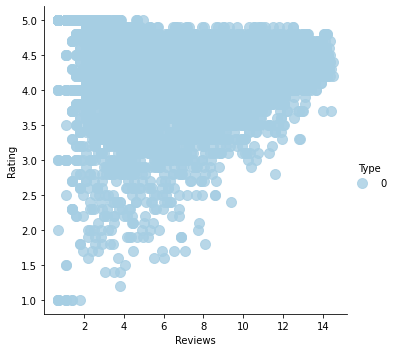

In [68]:
## 1.	Make scatter plot/joinplot for Rating vs. Price
#Make scatter plot/joinplot for Rating vs. Price

sns.lmplot("Reviews","Rating",data=df,hue="Type",fit_reg=False,palette="Paired",scatter_kws={"marker":"D","s":100})
plt.show()


## ## High "Reviews" high "Rating"

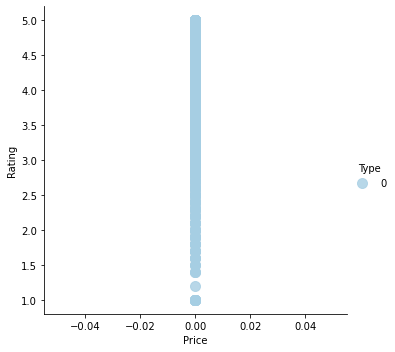

In [69]:


sns.lmplot("Price","Rating",data=df,hue="Type",fit_reg=False,palette="Paired",scatter_kws={"marker":"D","s":100})
plt.show()

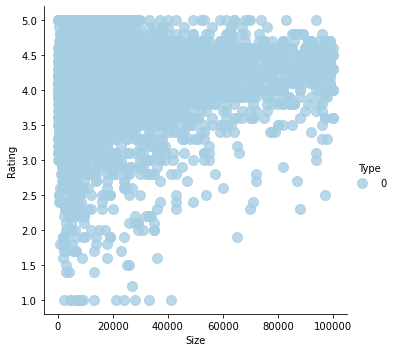

In [70]:


sns.lmplot("Size","Rating",data=df,hue="Type",fit_reg=False,palette="Paired",scatter_kws={"marker":"D","s":100})
plt.show()

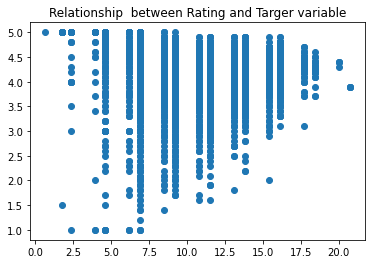

In [195]:
plt.scatter(df.Installs,df.Rating)                                  
plt.title("Relationship  between Rating and Targer variable")
plt.show()

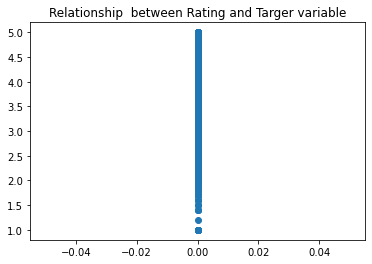

In [196]:
## Rating vs. Price

plt.scatter(df.Price,df.Rating)                                  
plt.title("Relationship  between Rating and Targer variable")
plt.show()


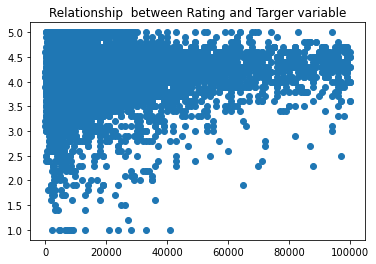

In [197]:
## scatter plot/joinplot for Rating vs. Size

plt.scatter(df.Size,df.Rating)                                  
plt.title("Relationship  between Rating and Targer variable")
plt.show()

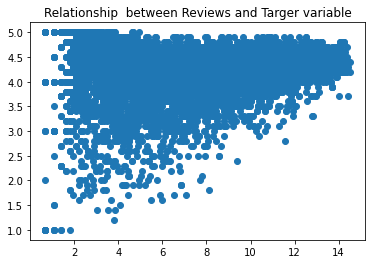

In [198]:
## scatter plot/joinplot for Rating vs. Reviews

plt.scatter(df.Reviews,df.Rating)
plt.title("Relationship  between Reviews and Targer variable")
plt.show()

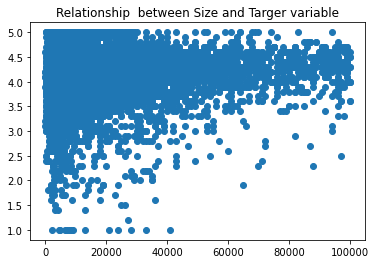

In [199]:
plt.scatter(df.Size,df.Rating)
plt.title("Relationship  between Size and Targer variable")
plt.show()

In [200]:
## dummy columns for Category, Genres, and Content Rating

inp2 = pd.get_dummies(df, columns=['Category','Genres','Content Rating'])   

In [201]:
inp2.head    ## [6919 rows x 156 columns]>

<bound method NDFrame.head of        Rating    Reviews     Size   Installs  Type  Price  Category_c  \
0         4.1   5.075174  19000.0   9.210440     0    0.0           0   
1         3.9   6.875232  14000.0  13.122365     0    0.0           0   
2         4.7  11.379520   8700.0  15.424949     0    0.0           0   
3         4.5  12.281389  25000.0  17.727534     0    0.0           0   
4         4.3   6.875232   2800.0  11.512935     0    0.0           0   
...       ...        ...      ...        ...   ...    ...         ...   
10833     4.8   3.806662    619.0   6.908755     0    0.0           3   
10834     4.0   2.079442   2600.0   6.216606     0    0.0          18   
10836     4.5   3.663562  53000.0   8.517393     0    0.0          18   
10837     5.0   1.609438   3600.0   4.615121     0    0.0          18   
10840     4.5  12.894981  19000.0  16.118096     0    0.0          16   

       Genres_c  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  ...  \
0             0 

In [202]:
merged =pd.concat([df,inp2],axis = 'columns')
merged

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_0,Content Rating_1,Content Rating_2,Content Rating_3,Content Rating_4,Content Rating_5
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0,0.0,0,Art & Design,0,...,0,0,0,0,1,0,0,0,0,0
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0,0.0,0,Art & Design;Pretend Play,0,...,0,0,0,0,1,0,0,0,0,0
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0,0.0,0,Art & Design,0,...,0,0,0,0,1,0,0,0,0,0
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,0,0.0,1,Art & Design,0,...,0,0,0,0,0,1,0,0,0,0
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0,0.0,0,Art & Design;Creativity,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,3.806662,619.0,6.908755,0,0.0,0,Books & Reference,3,...,0,0,0,0,1,0,0,0,0,0
10834,FAMILY,4.0,2.079442,2600.0,6.216606,0,0.0,0,Education,18,...,0,0,0,0,1,0,0,0,0,0
10836,FAMILY,4.5,3.663562,53000.0,8.517393,0,0.0,0,Education,18,...,0,0,0,0,1,0,0,0,0,0
10837,FAMILY,5.0,1.609438,3600.0,4.615121,0,0.0,0,Education,18,...,0,0,0,0,1,0,0,0,0,0


In [203]:
final = merged.drop(['Category','Category_c','Genres','Genres_Weather'],axis = 'columns')
final

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres_c,Rating,Reviews,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Word,Content Rating_0,Content Rating_1,Content Rating_2,Content Rating_3,Content Rating_4,Content Rating_5
0,4.1,5.075174,19000.0,9.210440,0,0.0,0,0,4.1,5.075174,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0,0.0,0,1,3.9,6.875232,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0,0.0,0,0,4.7,11.379520,...,0,0,0,0,1,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0,0.0,1,0,4.5,12.281389,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0,0.0,0,2,4.3,6.875232,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,619.0,6.908755,0,0.0,0,5,4.8,3.806662,...,0,0,0,0,1,0,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,0,0.0,0,11,4.0,2.079442,...,0,0,0,0,1,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0,0.0,0,11,4.5,3.663562,...,0,0,0,0,1,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0,0.0,0,11,5.0,1.609438,...,0,0,0,0,1,0,0,0,0,0


In [204]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [205]:
x_train = final.drop('Rating',axis ='columns')
x_train

,Reviews,Size,Installs,Type,Price,Content Rating,Genres_c,Reviews,Size,Installs,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Word,Content Rating_0,Content Rating_1,Content Rating_2,Content Rating_3,Content Rating_4,Content Rating_5
0,5.075174,19000.0,9.210440,0,0.0,0,0,5.075174,19000.0,9.210440,...,0,0,0,0,1,0,0,0,0,0
1,6.875232,14000.0,13.122365,0,0.0,0,1,6.875232,14000.0,13.122365,...,0,0,0,0,1,0,0,0,0,0
2,11.379520,8700.0,15.424949,0,0.0,0,0,11.379520,8700.0,15.424949,...,0,0,0,0,1,0,0,0,0,0
3,12.281389,25000.0,17.727534,0,0.0,1,0,12.281389,25000.0,17.727534,...,0,0,0,0,0,1,0,0,0,0
4,6.875232,2800.0,11.512935,0,0.0,0,2,6.875232,2800.0,11.512935,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.806662,619.0,6.908755,0,0.0,0,5,3.806662,619.0,6.908755,...,0,0,0,0,1,0,0,0,0,0
10834,2.079442,2600.0,6.216606,0,0.0,0,11,2.079442,2600.0,6.216606,...,0,0,0,0,1,0,0,0,0,0
10836,3.663562,53000.0,8.517393,0,0.0,0,11,3.663562,53000.0,8.517393,...,0,0,0,0,1,0,0,0,0,0
10837,1.609438,3600.0,4.615121,0,0.0,0,11,1.609438,3600.0,4.615121,...,0,0,0,0,1,0,0,0,0,0


In [206]:
y_train = final.Rating
y_train

,Rating,Rating
0,4.1,4.1
1,3.9,3.9
2,4.7,4.7
3,4.5,4.5
4,4.3,4.3
...,...,...
10833,4.8,4.8
10834,4.0,4.0
10836,4.5,4.5
10837,5.0,5.0


In [207]:
#model

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

In [208]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(4848, 160)
(4848, 2)
(2079, 160)
(2079, 2)


In [209]:
print(ytest.shape)

(2079, 2)


In [210]:
print(xtest.shape)

(2079, 160)


In [211]:
LinearRegression(n_jobs=-1)

LinearRegression(n_jobs=-1)

In [212]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs = -1)

model.fit(xtrain,ytrain)

LinearRegression(n_jobs=-1)

In [213]:
print(model.intercept_)
print(model.coef_)

[-9557.06120643 -9557.06120643]
[[-2.04671143e+00  2.08434988e+07 -4.57952453e+05  1.77455912e+06
   2.50965758e+05  2.41879605e+03  2.16975840e+06  2.21656544e+00
  -2.08434988e+07  4.57952305e+05 -1.84692294e+02 -3.57975245e+02
  -2.16973617e+06  1.94860279e+03 -6.03715709e+02  2.95113813e+03
   4.39236665e+03  3.96403824e+03  3.03432425e+03  1.37021943e+03
  -7.47710438e+02  1.94880317e+03  1.94874859e+03  4.99463555e+03
   1.94884797e+03 -1.35659009e+02  1.78129136e+03  1.94898919e+03
   2.21516993e+03  2.67978586e+03  1.57904105e+03  2.58260795e+03
   1.27681893e+03  1.40045837e+03 -9.91090056e+02  5.77175924e+02
   2.00888177e+03  1.12124698e+03  1.93864751e+03  1.83821025e+03
  -1.32752145e+03  1.88065368e+03  2.26198845e+03  1.79794647e+02
   1.94884799e+03  8.78876612e+02  3.08567106e+02  1.96397735e+01
   6.38012125e+01 -3.36038849e+02 -6.03226240e+02  2.64125256e+02
  -4.69438505e+02 -3.13655539e+02  1.04315391e+03  9.98600609e+02
   1.02064304e+03  3.52846642e+03 -4.8489791

In [214]:
print(final.columns.values.tolist())

['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres_c', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres_c', 'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME', 'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING', 'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL', 'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Genres_Action', 'Genres_Action;Action & Adventure', 

In [215]:
list(zip(final.columns,model.coef_))

[('Rating',
  array([-2.04671143e+00,  2.08434988e+07, -4.57952453e+05,  1.77455912e+06,
          2.50965758e+05,  2.41879605e+03,  2.16975840e+06,  2.21656544e+00,
         -2.08434988e+07,  4.57952305e+05, -1.84692294e+02, -3.57975245e+02,
         -2.16973617e+06,  1.94860279e+03, -6.03715709e+02,  2.95113813e+03,
          4.39236665e+03,  3.96403824e+03,  3.03432425e+03,  1.37021943e+03,
         -7.47710438e+02,  1.94880317e+03,  1.94874859e+03,  4.99463555e+03,
          1.94884797e+03, -1.35659009e+02,  1.78129136e+03,  1.94898919e+03,
          2.21516993e+03,  2.67978586e+03,  1.57904105e+03,  2.58260795e+03,
          1.27681893e+03,  1.40045837e+03, -9.91090056e+02,  5.77175924e+02,
          2.00888177e+03,  1.12124698e+03,  1.93864751e+03,  1.83821025e+03,
         -1.32752145e+03,  1.88065368e+03,  2.26198845e+03,  1.79794647e+02,
          1.94884799e+03,  8.78876612e+02,  3.08567106e+02,  1.96397735e+01,
          6.38012125e+01, -3.36038849e+02, -6.03226240e+02,  2.6

In [216]:
predictors = final.columns[:-1]
predictors

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres_c', 'Rating', 'Reviews',
       ...
       'Genres_Trivia', 'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Word',
       'Content Rating_0', 'Content Rating_1', 'Content Rating_2',
       'Content Rating_3', 'Content Rating_4'],
      dtype='object', length=161)

In [217]:
list(zip(final.columns,model.coef_))

[('Rating',
  array([-2.04671143e+00,  2.08434988e+07, -4.57952453e+05,  1.77455912e+06,
          2.50965758e+05,  2.41879605e+03,  2.16975840e+06,  2.21656544e+00,
         -2.08434988e+07,  4.57952305e+05, -1.84692294e+02, -3.57975245e+02,
         -2.16973617e+06,  1.94860279e+03, -6.03715709e+02,  2.95113813e+03,
          4.39236665e+03,  3.96403824e+03,  3.03432425e+03,  1.37021943e+03,
         -7.47710438e+02,  1.94880317e+03,  1.94874859e+03,  4.99463555e+03,
          1.94884797e+03, -1.35659009e+02,  1.78129136e+03,  1.94898919e+03,
          2.21516993e+03,  2.67978586e+03,  1.57904105e+03,  2.58260795e+03,
          1.27681893e+03,  1.40045837e+03, -9.91090056e+02,  5.77175924e+02,
          2.00888177e+03,  1.12124698e+03,  1.93864751e+03,  1.83821025e+03,
         -1.32752145e+03,  1.88065368e+03,  2.26198845e+03,  1.79794647e+02,
          1.94884799e+03,  8.78876612e+02,  3.08567106e+02,  1.96397735e+01,
          6.38012125e+01, -3.36038849e+02, -6.03226240e+02,  2.6

In [218]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt

In [220]:
 print(sqrt(mean_squared_error(ytrain, model.predict(xtrain))))   ## for errors: training = , testing = 
    
                                                              ## For errors testing results high > traning , (higher is not so expected)
                                                            
                                                                ##  ## if training results  high > testing
                                                             ## it  leads to overfitting
                
    
                                                              

0.4995397054952452


In [221]:
print(sqrt(mean_squared_error(ytest, model.predict(xtest))))

55.82128923381735


In [222]:
### Report the R2 on the test set

print('R2 Value: {}'. format(model.score(xtest, ytest))) 

R2 Value: -9681.78346619851


In [224]:
## Report the R2 on the train set                ## if training results very high > testing
                                                     ## it can leads to overfitting

print('R2 Value: {}'. format(model.score(xtrain, ytrain))) 

R2 Value: 0.14701772189073736


In [225]:
model.predict(xtest)

array([[3.81934908, 3.81934908],
       [4.34728712, 4.34728712],
       [4.25105815, 4.25105815],
       ...,
       [4.28586445, 4.28586445],
       [4.00391257, 4.00391257],
       [3.89020958, 3.89020958]])

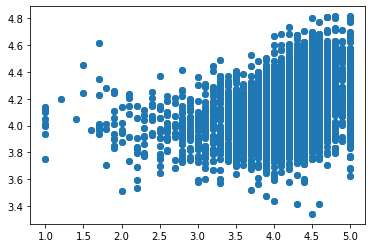

In [226]:
plt.scatter(ytrain,model.predict(xtrain))

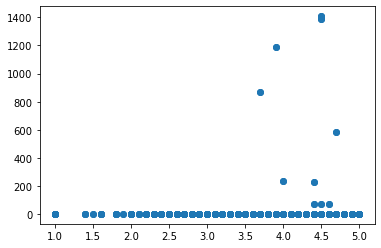

In [227]:
plt.scatter(ytest,model.predict(xtest))

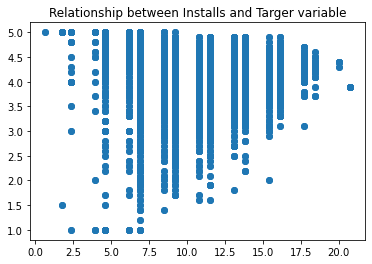

In [228]:
plt.scatter(final.Installs,final.Rating)
plt.title("Relationship between Installs and Targer variable")
plt.show()

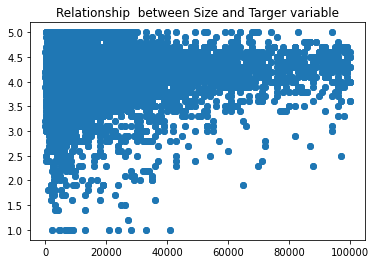

In [229]:
plt.scatter(final.Size,final.Rating)
plt.title("Relationship  between Size and Targer variable")
plt.show()

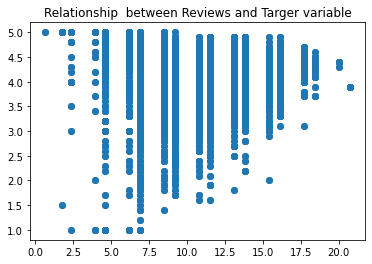

In [230]:
plt.scatter(final.Installs,final.Rating)
plt.title("Relationship  between Reviews and Targer variable")
plt.show()                                                     




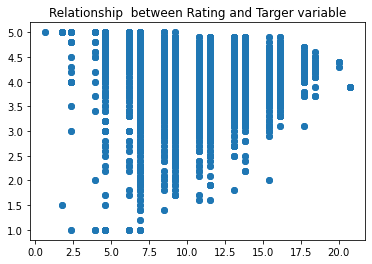

In [231]:
plt.scatter(final.Installs,final.Rating)
plt.title("Relationship  between Rating and Targer variable")
plt.show()